In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("./data/titanic.csv")
df['Embarked'] = df['Embarked'].astype(str)

df.info() 

# Observe we have a lot of missing values!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### 1. Keep only the following columns:  `Survived`,`Pclass`,`Sex`,`Age`, `Parch`,`Embarked`


In [2]:
# Answer:
df = df[['Survived','Pclass','Sex','Age','Parch','Embarked']]


#### 2. Replace `Sex` and `Embarked`  by numeric values using LabelEncoder. You need *two* different label encoders.


In [3]:
# Answer:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_port = LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Embarked'] = le_sex.fit_transform(df['Embarked'])



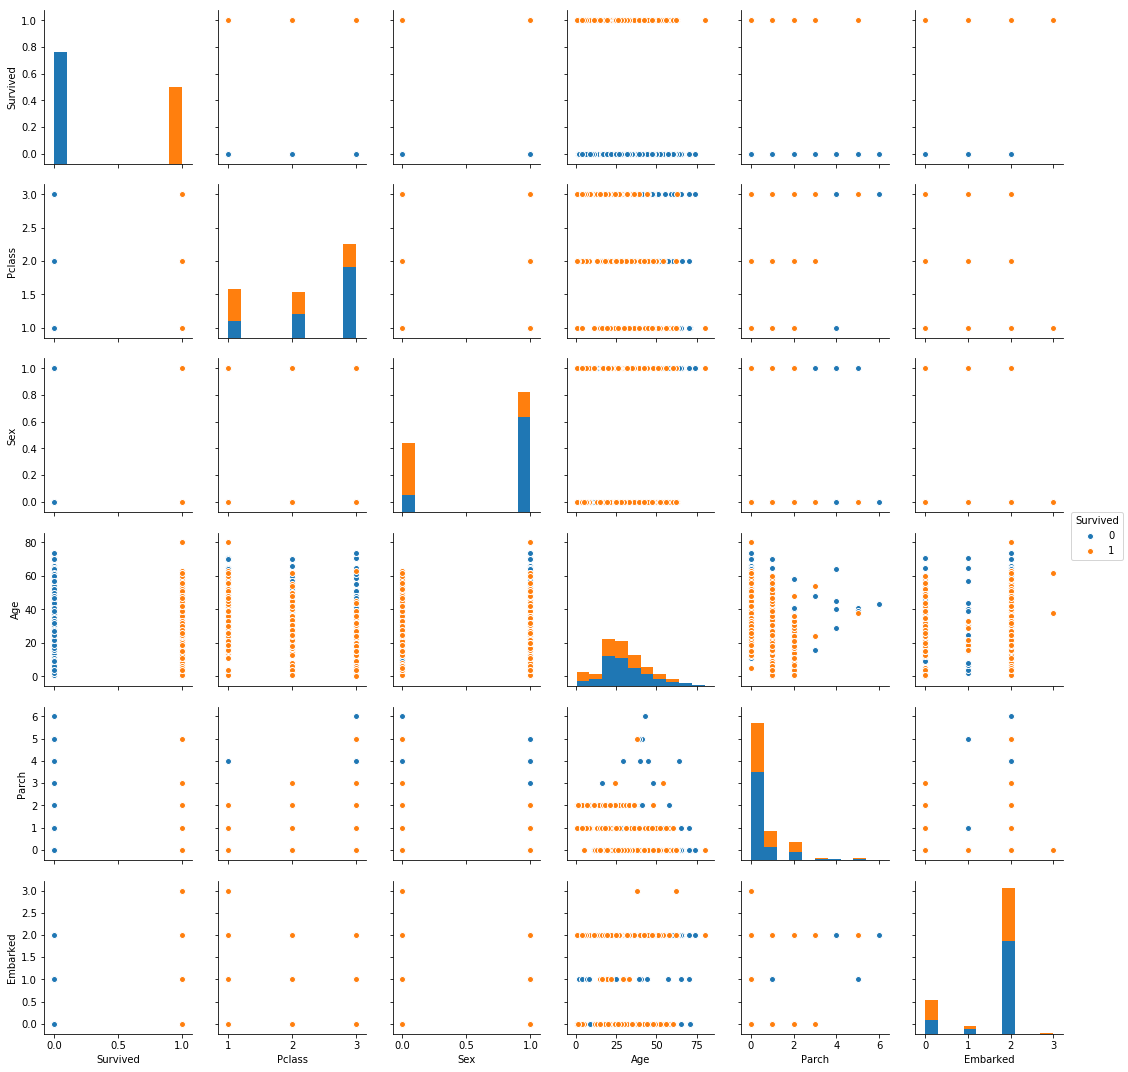

In [4]:
# We can look at some charts to get an intuition of the data
# If you don't have seaborn installed, try `!pip install seaborn` in the 
# iPython console

import seaborn as sns

sns.pairplot(df.dropna(axis=0), kind="scatter", hue="Survived")



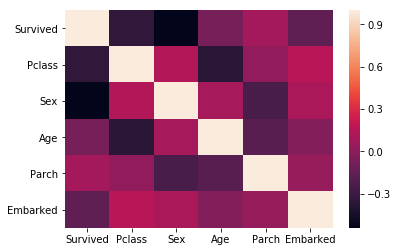

In [5]:
# Correlogram
sns.heatmap(df.corr())




So it seems like gender might play an important role... 

Let's deal with the missing age values.  One possibility is to replace them with the average


In [6]:

mean_age = np.mean(df['Age'])

for ix in range(len(df)):
    if np.isnan(df.loc[ix,'Age']):
        df.loc[ix,'Age'] = mean_age
              
df.info() # check that everything is good now



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
Parch       891 non-null int64
Embarked    891 non-null int64
dtypes: float64(1), int64(5)
memory usage: 41.8 KB


#### 3. Modelling time! Create a logistic regression model. Do the coefficients resemble the heatmap above?



In [7]:
# Answer:
y = df['Survived']
X = df[['Pclass','Sex','Age','Parch','Embarked']]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X,y)

clf = LogisticRegression()
clf.fit(X_train,y_train)
clf.score(X_test, y_test)


# Do
features = X.columns.values
coefs = clf.coef_

print("Most important features")
for feature, coef in sorted(zip(features,coefs[0]), key=lambda x: x[1]):
    print("{} : {} ".format(feature, coef))



Most important features
Sex : -2.467870971184549 
Pclass : -0.9521842391183205 
Embarked : -0.13963178989986907 
Age : -0.025346688122008944 
Parch : -0.021103753274736754 


#### 4. YOUR TURN! Make a better model. 

You can
- Use some of the other columns
- Change the replacement method for the Age column (the median instead of the
mean, for example)
- Add preprocessing steps
- Use other methods (random forest, decision trees)
